In [2]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import sounddevice as sd

In [3]:
def lms_noise_cancellation(primary_input, reference_input, filter_length, learning_rate, num_iterations):
    # Initialize filter coefficients with zeros
    w = np.zeros(filter_length)
    # Number of samples
    N = len(primary_input)
    
    # Initialize output signal
    output_signal = np.zeros(N)
    
    # Iterate through each sample
    for n in range(N):
        # Extract the current input samples for filtering
        x = np.zeros(filter_length)
        for i in range(filter_length):
            if n - i >= 0:
                x[i] = primary_input[n - i]
                                        
        # Calculate filter output
        y = np.dot(w, x)
      
        # Calculate error
        e = reference_input[n] - y
        
        # Update filter coefficients using LMS algorithm
        w = w + learning_rate * e * x
        
        # Store filtered output
        output_signal[n] = y
    
    return output_signal

In [4]:
audio_file = r"E:\frnds\python\clean_speech\harvard.wav"

# Load the audio signal
audio_signal, sample_rate = librosa.load(audio_file, sr=None)

# Generate Gaussian noise with the same length as the audio signal
noise =0.05* np.random.randn(len(audio_signal))

# Add noise to the audio signal
noisy_input_signal = audio_signal + noise

# Parameters
filter_length = 100
learning_rate = 0.001
num_iterations = 100

# Apply LMS noise cancellation
output_signal = lms_noise_cancellation(noisy_input_signal, audio_signal, filter_length, learning_rate, num_iterations)
#output_signal=adaptive_noise_cancelation(noisy_input_signal, audio_signal, filter_length=100, mu=0.01, epsilon=0.01)
# Play original signal
print("Playing original signal...")
sd.play(audio_signal, sample_rate)
sd.wait()

# Play noisy input signal
print("Playing noisy input signal...")
sd.play(noisy_input_signal, sample_rate)
sd.wait()

# Play filtered output signal
print("Playing filtered output signal...")
sd.play(output_signal, sample_rate)
sd.wait()

# Plotting (if needed)
time = np.arange(len(audio_signal)) / sample_rate

plt.figure(figsize=(10, 6))
plt.grid(True)

plt.subplot(3, 1, 1)
plt.plot(time, noisy_input_signal, label='Noisy Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noisy Input Signal')

plt.subplot(3, 1, 2)
plt.plot(time, audio_signal, label='Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Audio Signal')

plt.subplot(3, 1, 3)
plt.plot(time, output_signal, label='Filtered Output Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Audio Signal')

plt.tight_layout()
plt.legend()
plt.show()

KeyboardInterrupt: 

In [5]:

def generate_delayed_noise(length, std_dev, delay_rate):
    noise = std_dev * np.random.randn(length)
    delayed_noise = np.zeros_like(noise)
    delay_samples = int(delay_rate * len(noise))
    delayed_noise[delay_samples:] = noise[:-delay_samples]  # Apply delay to noise samples
    return delayed_noise

# Load the audio file using librosa
audio_file = r"E:\frnds\python\clean_speech\harvard.wav"
audio_signal, sample_rate = librosa.load(audio_file, sr=None)
noise_std_dev = 0.05
noise_delay_rate = 0.5  # Adjust delay rate as needed
delayed_noise = generate_delayed_noise(len(audio_signal), noise_std_dev, noise_delay_rate)

# Add delayed noise to the audio signal
noisy_input_signal = audio_signal + delayed_noise

# Parameters for LMS noise cancellation
filter_length = 100
learning_rate = 0.001
num_iterations = 100

# Apply LMS noise cancellation
output_signal = lms_noise_cancellation(noisy_input_signal, audio_signal, filter_length, learning_rate, num_iterations)
# Play original signal and delayed input signal using sounddevice (sd)
output_signal = lms_noise_cancellation(noisy_input_signal,audio_signal, filter_length, learning_rate, num_iterations)
print("Playing original signal...")
sd.play(audio_signal, sample_rate)
sd.wait()


print("Playing noisy input signal...")
sd.play(noisy_input_signal, sample_rate)
sd.wait()

# Play filtered output signal
print("Playing filtered output signal...")
sd.play(output_signal, sample_rate)
sd.wait()

# Plotting (if needed)
time = np.arange(len(audio_signal)) / sample_rate

plt.figure(figsize=(10, 6))
plt.grid(True)

plt.subplot(3, 1, 1)
plt.plot(time, noisy_input_signal, label='Noisy Input Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noisy Input Signal')

plt.subplot(3, 1, 2)
plt.plot(time, audio_signal, label='Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Original Audio Signal')

plt.subplot(3, 1, 3)
plt.plot(time, output_signal, label='Filtered Output Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Filtered Audio Signal')

plt.tight_layout()
plt.legend()
plt.show()

NameError: name 'delayed_input_signal' is not defined

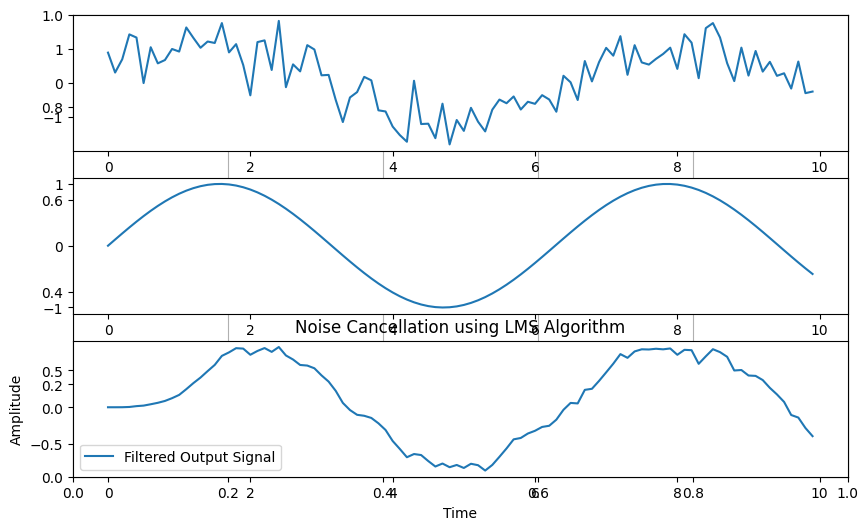

In [13]:

# Example usage:
# Generate noisy input signal and reference (desired) signal
np.random.seed(0)
time = np.arange(0, 10, 0.1)
noise = 0.5 * np.random.randn(len(time))
desired_signal = np.sin(time)
noisy_input_signal = desired_signal + noise
'''print(desired_signal)
print("\n")
print(noise)
print("\n")
print(noisy_input_signal)'''
# Parameters
filter_length = 20
learning_rate = 0.01
num_iterations = 1000

# Apply LMS noise cancellation
output_signal = lms_noise_cancellation(noisy_input_signal, desired_signal, filter_length, learning_rate, num_iterations)



plt.figure(figsize=(10, 6))
plt.grid(True)

plt.subplot(3, 1, 1)
plt.plot(time, noisy_input_signal, label='Noisy Input Signal')
plt.subplot(3,1,2)
plt.plot(time, desired_signal, label='Desired Signal')
plt.subplot(3,1,3)
plt.plot(time, output_signal, label='Filtered Output Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Noise Cancellation using LMS Algorithm')
plt.legend()

plt.show()

In [55]:

'''length=len(desired_signal)
channel = np.random.randn(length) * 0.5  # Example channel distortion
recived_signal = np.convolve(desired_signal, channel)'''

recived_signal = noisy_input_signal + noise
output_signal = lms_noise_cancellation(recived_signal, desired_signal, filter_length, learning_rate, num_iterations)

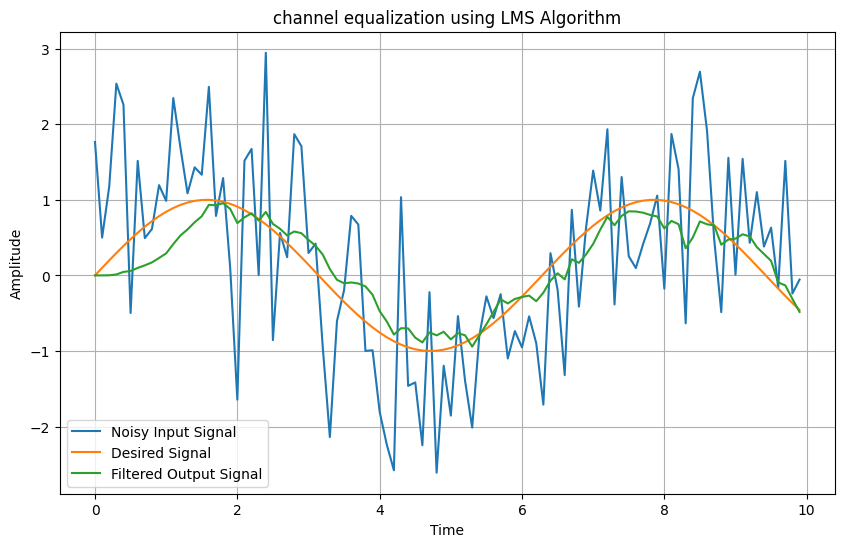

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(time, recived_signal, label='Noisy Input Signal')
plt.plot(time, desired_signal, label='Desired Signal')
plt.plot(time, output_signal, label='Filtered Output Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('channel equalization using LMS Algorithm')
plt.legend()
plt.grid(True)
plt.show()

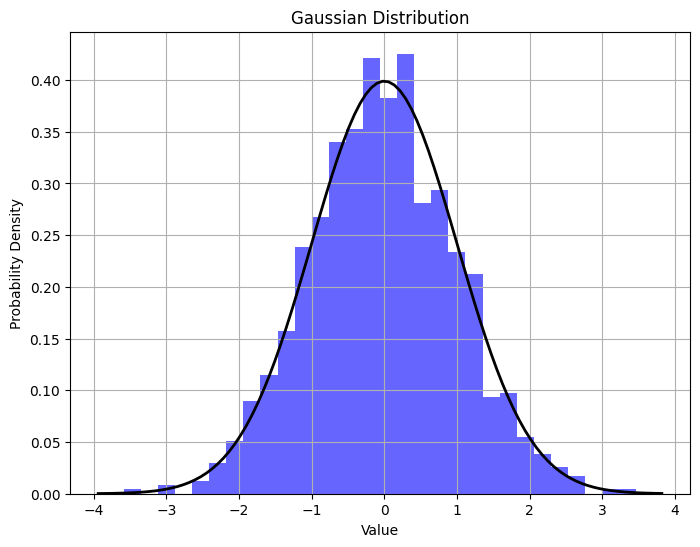

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the Gaussian distribution
mu = 0  # Mean
sigma = 1  # Standard deviation
num_samples = 1000  # Number of samples

# Generate random samples from a Gaussian distribution
samples = np.random.normal(mu, sigma, num_samples)

# Plotting the histogram of the samples
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b')

# Plot the probability density function (PDF) of the Gaussian distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, pdf, 'k', linewidth=2)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution')

plt.grid(True)
plt.show()
